# CS M148 Project 2 - Binary Classification Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a **patient is suffering from heart disease** based on a host of potential medical factors.

**DEFINITIONS**

**Binary Classification:** In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

**Supervised Learning:** This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
- **age:** Age in years
- **sex:** (1 = male; 0 = female)
- **cp:** Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
- **cholserum:** Cholestoral in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeakST:** Depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
- **ca:** Number of major vessels (0-4) colored by flourosopy
- **thal:** 1 = normal; 2 = fixed defect; 3 = reversable defect
- **sick:** Indicates the presence of Heart disease (True = Disease; False = No disease)

`sick` is the label that you will be predicting.

## Loading Essentials and Helper Functions 

In [1]:
# Here are a set of libraries we imported to complete this assignment. 
# Feel free to use these or equivalent libraries for your implementation
# and also add more import statements if any are missing.
# If you can run this cell without any errors, you're ready to go.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

import os
import random

%matplotlib inline

random.seed(148) 

In [2]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, y_hat, title_name="Confusion Matrix"):
    '''Draws a confusion matrix for the given target and predictions'''
    cm = metrics.confusion_matrix(y, y_hat)
    metrics.ConfusionMatrixDisplay(cm).plot()
    plt.title(title_name)

## Part 1. Load the Data and Analyze

Let's load our dataset so we can work with it (correct the path if your notebook is in a different directory than the .csv file).

In [3]:
df = pd.read_csv('heartdisease.csv')

### Question 1.1 

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the `head()`, `describe()`, and `info()` methods to display some of the rows so we can get a sense of the data.

In [4]:
# Your code here
# You may use separate cells if you'd like (one for `head`, one for `describe`, etc.)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Question 1.2
If you looked carefully, you might have noticed that in the data, all the `sick=False` values come before the `sick=True` values in the dataset. Why might this be problematic?

This could be problematic because if we were to use a single validation set, we might not get a model that fits both True and False values. This could be because the ordering of the data could influence the model. It may also result in other biases when fitting a model.

### Question 1.3
Shuffle the rows in the dataframe so that the `sick=False` and `sick=True` values are randomly distributed in the dataframe.

In [6]:
df = df.sample(frac=1, random_state=148)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,False
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,True
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,False
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,False
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,False
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,True
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,False
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,False


### Question 1.4
Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problematic and why?

The boolean column may be problematic, because it is the only non-numeric input. Other columns that could potentially be problematic are categorical columns that have integer representations. This is because their numerical values don't hold meaning, so some trends may not appear, or may seem more significant than they really are.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 10 to 83
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 33.4 KB


### Question 1.5
Determine if we're dealing with any null values. If so, report which columns.

There are no null values in this dataset

### Question 1.6
Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean `sick` variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original `sick` datafield from the dataframe.

In [8]:
df["sick"] = np.where(df["sick"] == True, 1, 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,0
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,1
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,0
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,0
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,0


### Question 1.7
Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to get a feel of how each variable performs (for example, is it a binary, or limited selection, or does it follow a gradient)? 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'sick'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

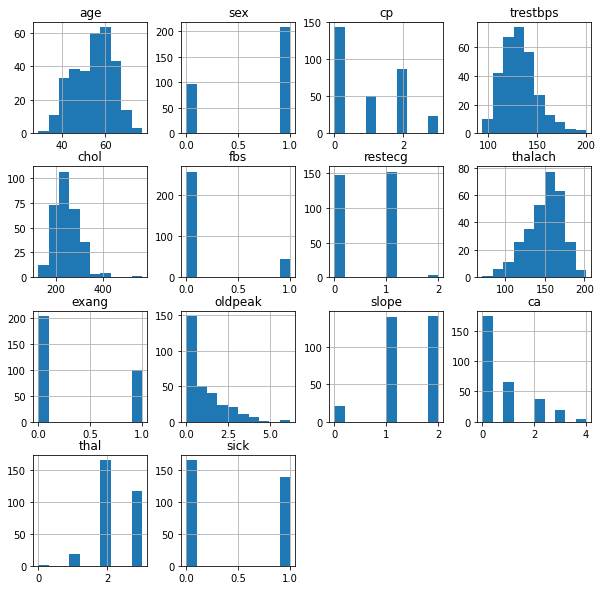

In [9]:
df.hist(figsize=(10, 10))

### Question 1.8
We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results.

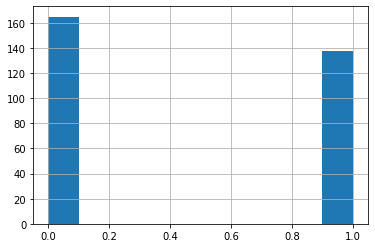

0    165
1    138
Name: sick, dtype: int64

In [10]:
df["sick"].hist()
plt.show()
df["sick"].value_counts()

As we can see, our sample contains 165 healthy individuals and 138 sick individuals, which reflects a decently balanced dataset-- the difference between the number of sick and healthy indivuals is small.

### Question 1.9

Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Artificially balancing a dataset can alter any trends or correlations that are present in the unaltered dataset.

### Question 1.10

Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations (get some domain knowledge). Intuitively, why do you think some variables correlate more highly than others? Also discuss some pairs of variables that have very little correlation and why this might be the case for them.

We observe moderate positive correlations between those with heart disease, and age, exercise induced angina, number of major vessels colored by flouroscopy, and depression induced by exercise relative to rest. These correlations make sense, as those who do have heart disease are likely to be older, and have heart problems that require medical attention. There is also a negative correlation with heart disease and maximum heart rate -- this is also understandable, as those with heart disease probably can't achieve a high heart rate.

Other variables we see high levels of correlations between include age and resting blood pressure, maximum heart rate achieved, and number of major vessels colored by fluoroscopy. These correlations make sense, since as someone ages, their blood vessels become more stiff, resulting in higher blood pressure. Additionally, as someone ages, their heart might not be able to beat as fast as when they were younger, leading to decreased maximum heart rate. As for the number of major vessels colored, this correlation could likely be a result of more vessels needing to be examined for abnormalities.

Other variables that had a high correlations include maximum heart rate achieved, and exercised induced angina, slope of the peak exercise ST segment, and depression induced by exercise relative to rest. The high negative correlation between maximum heart rate and exercise induced angina makes sense, as those with exercise induced anginas likely aren't able to reach a high heart rate. Maximmum heart rate has a high positive correlation with slope of the ST segment, and a high negative correlation with depression of the ST segment. This also makes sense, as a very positive slope is indicative of a healthy heart, while a very positive depression of the ST segment is indicative of an unhealthy heart.

Slope of the peak exercise ST segment and depression induced by exercise relative to rest also had a very high negative correlation. Normally, slope of the ST segment should be positive, the ST segment should slope upward during exercise. Thus, the negative correlation indicates that as the slope of the ST segment becomes more negative, one average, the depression of the ST segment decreases, generally indicating a healthier heart. Thus, it makes sense that if one's ST segment has a negative slope, it would become more depressed during exercise, as both are indications of an abnormal heart.

On the other hand, some variables have very low correlation, such as cholesterol and fasting blood sugar, maximum heart rate achieved, and slope of the ST segment. This is likely because cholesterol and blood sugar are influenced by different factors. As for the other two variables, the low correlation could simply be because maximum heart rate and ST segment slope vary too much to be able to find a relationship between the two and cholesterol.

Another example of variables with low correlation is resting ecg results and thal. This could be because they are both categorical variables, where the values these variables take on aren't "good" or "bad" as they increase or decrease.

<AxesSubplot:>

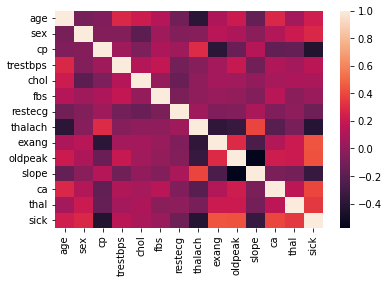

In [11]:
sns.heatmap(df.corr())

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


## Part 2. Prepare the Data

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

We're going to ask you to prepare 2 batches of data:
1. Raw numeric data that hasn't gone through any additional pre-processing.
2. Data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1
Save the target column as a separate array and then drop it from the dataframe. 

In [13]:
df_sick = df["sick"]
df = df.drop("sick", axis=1)

### Question 2.2
Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the `train_test_split` method). Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [14]:
df_train, df_test, df_sick_train, df_sick_test = train_test_split(df, df_sick, test_size=0.2, random_state=148)
print(df_train.shape)
print(df_test.shape)
print(df_sick_train.shape)
print(df_sick_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### Question 2.3

In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN relies on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a KNN algorithm on our data (use `scikit-learn`) and report the results. For this initial implementation simply use the default KNN model settings. Report on the accuracy of the resulting model.

In [15]:
model = KNeighborsClassifier()
model.fit(df_train, df_sick_train)
df_sick_pred = model.predict(df_test)
print(df_sick_pred)
print("Accuracy:",metrics.accuracy_score(df_sick_test, df_sick_pred))

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0]
Accuracy: 0.6885245901639344


### Question 2.4 
Now implement a pipeline of your choice to transform the data. You can opt to handle null values and categoricals however you wish, however please scale your numeric features using standard scaler. Refer to Project 1 for a example pipeline that you can mimic.

In [16]:
# no null values or categorical features
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Transform categorical/numerical columns using different approaches:
categorical_features = ["cp", "slope", "thal", "restecg", "sex", "fbs", "exang"]
numerical_features = [x for x in df.columns if x not in categorical_features]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

df_transformed = full_pipeline.fit_transform(df)

df_transformed.shape

(303, 26)

### Question 2.5

Now split your pipelined data into an 80/20 split and run the same KNN as you did previously. Report its accuracy, and discuss the implications of the different results you are obtaining.

In [17]:
df_train, df_test, df_sick_train, df_sick_test = train_test_split(df_transformed, df_sick, test_size=0.2, random_state=148)
model = KNeighborsClassifier()
model.fit(df_train, df_sick_train)
df_sick_pred = model.predict(df_test)
print(df_sick_pred)
print("Accuracy:",metrics.accuracy_score(df_sick_test, df_sick_pred))

[0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0]
Accuracy: 0.9016393442622951


### Question 2.6 Hyperparameter Optimization

As we saw in lecture, the KNN Algorithm includes an `n_neighbors` attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Let's now let `n` take on the values 1, 2, 3, 5, 7, 9, 10, 20, 50, 75, and 100. Run your model for each value and report the accuracy for each. Then, create a plot of accuracy versus `n_neighbors` and discuss how and why the accuracy changes as `n_neighbors` changes.

HINT: leverage Python's ability to loop to run through the array and generate results so that you don't need to manually code each iteration.

At first, as the number of n_neighbors increases, the accuracy increases, because we are using more data to make predictions. However, at a certain point, accuracy begins to decrease, because we begin to overfit our training data, making the model not fit our test data as well.

Accuracy for 1 neighbors: 0.7377049180327869
Accuracy for 2 neighbors: 0.8524590163934426
Accuracy for 3 neighbors: 0.8360655737704918
Accuracy for 5 neighbors: 0.9016393442622951
Accuracy for 7 neighbors: 0.8852459016393442
Accuracy for 9 neighbors: 0.8524590163934426
Accuracy for 10 neighbors: 0.8852459016393442
Accuracy for 20 neighbors: 0.8524590163934426
Accuracy for 50 neighbors: 0.8688524590163934
Accuracy for 75 neighbors: 0.8688524590163934
Accuracy for 100 neighbors: 0.8852459016393442


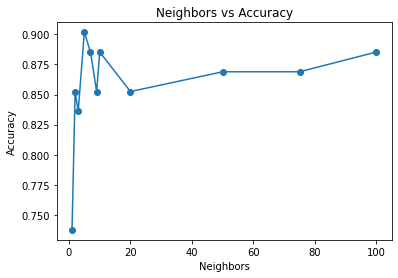

In [18]:
neighbors = [1, 2, 3, 5, 7, 9, 10, 20, 50, 75,  100]
accuracy = []
for x in neighbors:
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(df_train, df_sick_train)
    df_sick_pred = model.predict(df_test)
    print("Accuracy for", x, "neighbors:",metrics.accuracy_score(df_sick_test, df_sick_pred))
    accuracy.append(metrics.accuracy_score(df_sick_test, df_sick_pred))
plt.plot(neighbors, accuracy, marker='o')
plt.title("Neighbors vs Accuracy")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()

## Part 3. Additional Learning Methods
So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare results. Throughout this part, use the data that was produced by your pipeline earlier.

### Linear Decision Boundary Methods
We'll spend some time exploring logistic regression and SVM methods.

### Question 3.1 Logistic Regression
Let's now try a classifier, we introduced in lecture, one that's well known for handling linear models: logistic regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.  Implement a logistic regression classifier from `scikit-learn` on your data with the default settings. For both training and test data, report accuracy, precision, recall, and F1 score and plot a confusion matrix.

Accuracy: 0.864
Precision: 0.875
Recall: 0.820
F1 Score: 0.847


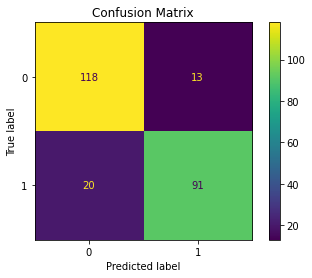

In [19]:
log_reg = LogisticRegression()
log_reg.fit(df_train, df_sick_train)

train_predictions_1 = log_reg.predict(df_train)

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_train, train_predictions_1))
print('Precision: %.3f' % metrics.precision_score(df_sick_train, train_predictions_1))
print('Recall: %.3f' % metrics.recall_score(df_sick_train, train_predictions_1))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_train, train_predictions_1))

draw_confusion_matrix(df_sick_train, train_predictions_1, title_name="Confusion Matrix")

Accuracy: 0.852
Precision: 0.875
Recall: 0.778
F1 Score: 0.824


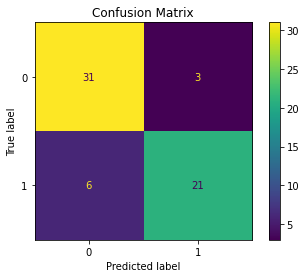

In [20]:
test_predictions_1 = log_reg.predict(df_test)

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, test_predictions_1))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, test_predictions_1))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, test_predictions_1))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, test_predictions_1))

draw_confusion_matrix(df_sick_test, test_predictions_1, title_name="Confusion Matrix")

### Question 3.2


Discuss what each measure (accuracy, precision, recall, and F1 score) is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

The precision score is calculated by taking the ratio of true positives to total predicted positives, essentially representing our model's ability to correctly predict positives. The recall score is calculated by taking the ratio of true positives to actual positives, measuring the model's ability to predict positives from actual positives. The accuracy score calculates the ratio of the model's correct predictions to all of the predictions. The F1 score is essentially an alternative to accuarcy score, since it doesn't require that we know the total number of observations. 

Precision score and recall score are most useful when the classes are imbalanced, as they only looks at the positives. Precision is good to look at when the cost of predicting a false positive is high, such as detecting spam emails. Recall is good for when the cost of false negatives high, such as not detecting disease in an individual. The accuracy score is good to see on correct your model is, when you just want a high level overview of your model's accuracy, and classes are fairly evenly distributed. F1 score is good when you want to balance recall and precision, and there is uneven class distribution.

### Question 3.3
Graph the ROC curve of the logistic regression model.

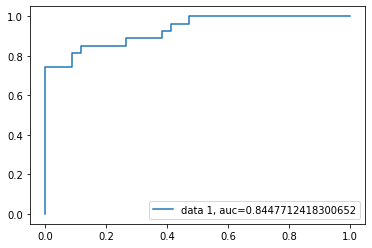

In [21]:
y_pred_proba_1 = log_reg.predict_proba(df_test)[::,1]
fpr_1, tpr_1, _ = metrics.roc_curve(df_sick_test,  y_pred_proba_1)
auc_1 = metrics.roc_auc_score(df_sick_test, test_predictions_1)
plt.plot(fpr_1,tpr_1,label="data 1, auc="+str(auc_1))
plt.legend(loc=4)
plt.show() 

### Question 3.4

Describe what an ROC curve is and what your ROC graph output is showing.

ROC stands for Radio Operator Characteristics, and it illustrates the tradeoff for all the possible threshholds chosen for the true positive rate and false positive rate. The x-axis is the false positive rate, and the y-axis is the true negative rate. 

As we can see on our graph, as our false positive rate increases, the true positive rate generally increases. There are parts of the graph that are vertical, indicating that the true positive rate is within a certain rage for that particular false positive rate. The same can be said for horizontal portions of the graph: the false positive rate lies within a certain range for that particular true positive rate.

### Question 3.5

Let's tweak a few settings. Set your solver to `sag`, your `max_iter=10`, and `penalty='none'`, and rerun your model. Report out the same metrics (the 4 + confusion matrix) as before, and also graph an ROC curve. How do your results change?

The values of the four metrics decreased, with more false positives and false negatives being reported.

Accuracy: 0.852
Precision: 0.875
Recall: 0.778
F1 Score: 0.824


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


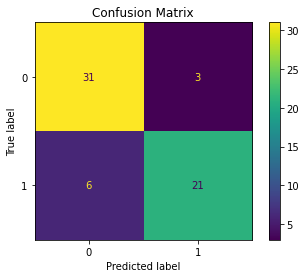

In [22]:
log_reg_sag = LogisticRegression(solver='sag', max_iter=10, penalty='none')
log_reg_sag.fit(df_train, df_sick_train)

test_predictions_2 = log_reg_sag.predict(df_test)

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, test_predictions_2))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, test_predictions_2))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, test_predictions_2))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, test_predictions_2))

draw_confusion_matrix(df_sick_test, test_predictions_2, title_name="Confusion Matrix")

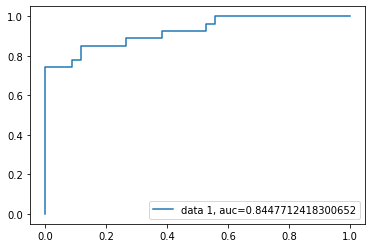

In [23]:
y_pred_proba_2 = log_reg_sag.predict_proba(df_test)[::,1]
fpr_2, tpr_2, _ = metrics.roc_curve(df_sick_test,  y_pred_proba_2)
auc_2 = metrics.roc_auc_score(df_sick_test, test_predictions_2)
plt.plot(fpr_2,tpr_2,label="data 1, auc="+str(auc_2))
plt.legend(loc=4)
plt.show() 

### Question 3.6

Did you notice that when you ran the previous model you got the following warning: `ConvergenceWarning: The max_iter was reached which means the coef_ did not converge.` Check the documentation and see if you can implement a fix for this problem, and again report your results (4 metrics, confusion matrix, ROC curve).

Note: if you did not get a warning, which might happen to those running this notebook in VSCode, please try running the following code, as described [here](https://github.com/microsoft/vscode-jupyter/issues/1312):
```
import warnings
warnings.simplefilter(action="default")
```

Accuracy: 0.852
Precision: 0.875
Recall: 0.778
F1 Score: 0.824


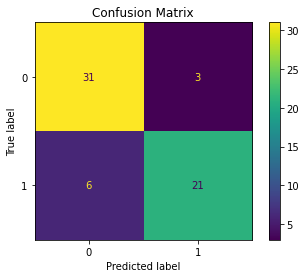

In [24]:
log_reg_sag_fix = LogisticRegression(solver='sag', max_iter=1000, penalty='none')
log_reg_sag_fix.fit(df_train, df_sick_train)

test_predictions_2_fix = log_reg_sag_fix.predict(df_test)

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, test_predictions_2_fix))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, test_predictions_2_fix))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, test_predictions_2_fix))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, test_predictions_2_fix))

draw_confusion_matrix(df_sick_test, test_predictions_2_fix, title_name="Confusion Matrix")

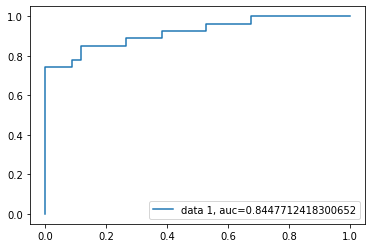

In [25]:
y_pred_proba_2_fix = log_reg_sag_fix.predict_proba(df_test)[::,1]
fpr_2_fix, tpr_2_fix, _ = metrics.roc_curve(df_sick_test,  y_pred_proba_2_fix)
auc_2_fix = metrics.roc_auc_score(df_sick_test, test_predictions_2_fix)
plt.plot(fpr_2_fix,tpr_2_fix,label="data 1, auc="+str(auc_2_fix))
plt.legend(loc=4)
plt.show() 

### Question 3.7

Explain what you changed and why this fixed the `ConvergenceWarning` problem. Are there any downsides of your fix? How might you have harmed the outcome instead? What other parameters you set may be playing a factor in affecting the results?

I incresed max_iter from 10 to 1000, which allowed the algorithm to run more iterations, so it could converge. One potential downside of increasing maximum iterations is that slow convergence could be indicative of several problems, and increasing max iterations ignores these potential problems. Ignoring possible problems could result in an inaccurate model. The penalty we set and solver we choose could also be affecting our results.

### Question 3.8
Rerun your logistic classifier, but modify the `penalty='l2'`, `solver='newton-cg'` and again report the results (4 metrics, confusion matrix, ROC curve)


Accuracy: 0.852
Precision: 0.875
Recall: 0.778
F1 Score: 0.824


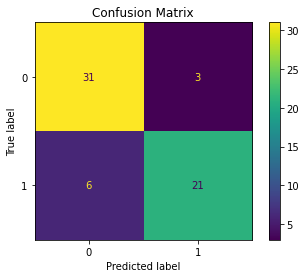

In [26]:
log_reg_new = LogisticRegression(solver='newton-cg', max_iter=100, penalty='l2')
log_reg_new.fit(df_train, df_sick_train)

test_predictions_3 = log_reg_new.predict(df_test)

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, test_predictions_3))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, test_predictions_3))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, test_predictions_3))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, test_predictions_3))

draw_confusion_matrix(df_sick_test, test_predictions_3, title_name="Confusion Matrix")

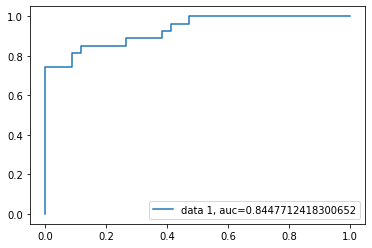

In [27]:
y_pred_proba_3 = log_reg_new.predict_proba(df_test)[::,1]
fpr_3, tpr_3, _ = metrics.roc_curve(df_sick_test,  y_pred_proba_3)
auc_3 = metrics.roc_auc_score(df_sick_test, test_predictions_3)
plt.plot(fpr_3,tpr_3,label="data 1, auc="+str(auc_3))
plt.legend(loc=4)
plt.show() 

### Question 3.9

Explain how the 2 solvers work and how they differ from each other.

sag stands for Stochastic Average Gradient, and it's a variation of gradient descent. It takes random samples of previous gradient descent values, which makes it fast for big datasets. On the other hand, newton-cg uses an exact Hessian matrix, meaning it has to compute up to second-order derivatives, making it slow for large datasets. 

### Question 3.10

We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and the difference between L1 and L2 penalties.

The purpose of having a penalty term is for regularization, to tune the model to prevent overfitting. The L1 penalty is lasso regression and L2 penalty is ridge regression. Ridge regression adds a penalty to the cost function equivalent to square of the magnitude of the coefficients, putting a constraint on the coefficients. If the coefficients are large, the optimization function is penalized. Lasso regression does something similar, but instead of taking the square of the coefficients, it takes the magnitudes, so it can lead to zero coefficients. This helps with feature elimination.

### Question 3.11 Support Vector Machine (SVM)

A support vector machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In 2-D space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

Implement an SVM classifier on your pipelined data (recommend using `scikit-learn`) For this implementation you can simply use the default settings, but set `probability=True`.

In [28]:
clf_1 = SVC(probability=True)
clf_1.fit(df_train, df_sick_train)
svm_pred_1 = clf_1.predict(df_test)

### Question 3.12 
Report the accuracy, precision, recall, F1 Score, confusion matrix, and ROC curve of the resulting model.

Accuracy: 0.885
Precision: 0.917
Recall: 0.815
F1 Score: 0.863


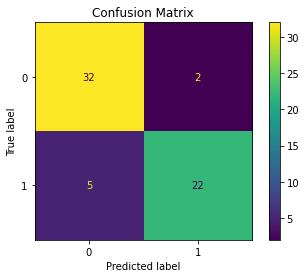

In [29]:
print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, svm_pred_1))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, svm_pred_1))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, svm_pred_1))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, svm_pred_1))

draw_confusion_matrix(df_sick_test, svm_pred_1, title_name="Confusion Matrix")

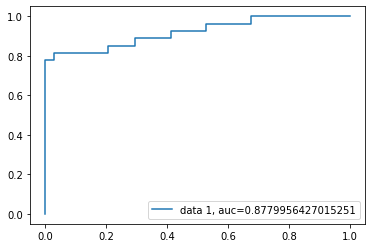

In [30]:
y_pred_proba_4 = clf_1.predict_proba(df_test)[::,1]
fpr_4, tpr_4, _ = metrics.roc_curve(df_sick_test,  y_pred_proba_4)
auc_4 = metrics.roc_auc_score(df_sick_test, svm_pred_1)
plt.plot(fpr_4,tpr_4,label="data 1, auc="+str(auc_4))
plt.legend(loc=4)
plt.show() 

### Question 3.13
Rerun your SVM, but now modify your model parameter kernel to be `linear`. Again report your accuracy, precision, recall, F1 scores, and confusion matrix and plot the new ROC curve.  

Accuracy: 0.852
Precision: 0.875
Recall: 0.778
F1 Score: 0.824


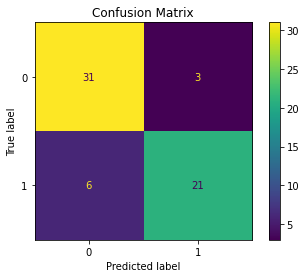

In [31]:
clf_2 = SVC(probability=True, kernel="linear")
clf_2.fit(df_train, df_sick_train)
svm_pred_2 = clf_2.predict(df_test)

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, svm_pred_2))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, svm_pred_2))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, svm_pred_2))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, svm_pred_2))

draw_confusion_matrix(df_sick_test, svm_pred_2, title_name="Confusion Matrix")

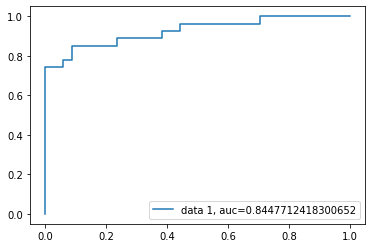

In [32]:
y_pred_proba_5 = clf_2.predict_proba(df_test)[::,1]
fpr_5, tpr_5, _ = metrics.roc_curve(df_sick_test,  y_pred_proba_5)
auc_5 = metrics.roc_auc_score(df_sick_test, svm_pred_2)
plt.plot(fpr_5,tpr_5,label="data 1, auc="+str(auc_5))
plt.legend(loc=4)
plt.show() 

### Question 3.14

Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing the kernel parameter might impact the results in the manner you've observed.

When we set kernel to 'linear', we can see that our four metrics all decreased, which indicates that a linear kernel may not be the best fit for this dataset. By changing the kernel from the default 'rbf' to 'linear', we try to separate our data linearly, to see if it's better to use the simpler, linear classifier. If our data fits well with this linear classifier, we would likely see our four metrics stay the same, or change slightly. If the linear classifier doesn't make sense for our data, then we would  likely see our metrics reflect this.

### Question 3.15

Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. How do they differ in how they try to find this boundary?

Logistic regression uses a logistic function to try and find the relationship between variables, whicle SVM creates a decision boundary to separate the classes, trying to find the best separator between the classes. SVM is less vulnerable to overfitting. 

### Question 3.16
We also learned about linear regression in class. Why is linear regression not a suitable model for this classification task?

We choose logistic rather than linear regression because we are not trying to predict a quantitative variable, but rather a categorical one. With classification problems, we're trying to place each observation into a category, thus we use logistic regression.

### Statistical Classification Methods
Now we'll explore a statistical classification method, the naive Bayes classifier.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Bayes' theorem states the following relationship, given class variable $C_k$ and dependent feature vector $\bold{x} = [x_1, x_2, ..., x_n]^T$, $$P(C_k | \bold{x}) = \frac{P(C_k)P(\bold{x} | C_k)}{P(\bold{x})}$$

Note for our purposes, there are 2 possible classes (sick or not sick), so $k$ ranges from 1 to 2.

### Question 3.17
Implement a naive Bayes Classifier on the pipelined data. Use the `GaussianNB` model. For this model, simply use the default parameters. Report out the number of mislabeled points that result (i.e., both the false positives and false negatives), along with the accuracy, precision, recall, F1 Score and confusion matrix. Also, plot an ROC curve.

Number of mislabeled points out of a total 61 points: 11
Accuracy: 0.820
Precision: 0.808
Recall: 0.778
F1 Score: 0.792


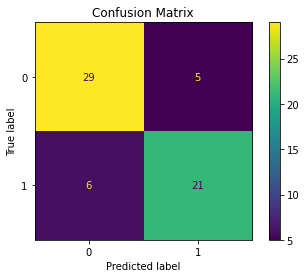

In [33]:
gnb = GaussianNB()
gnb_class = gnb.fit(df_train, df_sick_train)
gnb_pred = gnb_class.predict(df_test)

print("Number of mislabeled points out of a total", df_test.shape[0], "points:", (df_sick_test != gnb_pred).sum())

print('Accuracy: %.3f' % metrics.accuracy_score(df_sick_test, gnb_pred))
print('Precision: %.3f' % metrics.precision_score(df_sick_test, gnb_pred))
print('Recall: %.3f' % metrics.recall_score(df_sick_test, gnb_pred))
print('F1 Score: %.3f' % metrics.f1_score(df_sick_test, gnb_pred))

draw_confusion_matrix(df_sick_test, gnb_pred, title_name="Confusion Matrix")

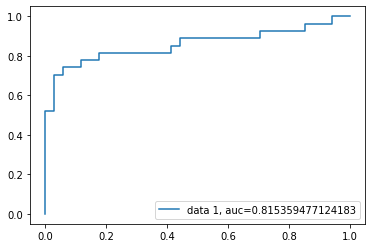

In [34]:
y_pred_gnb = gnb_class.predict_proba(df_test)[::,1]
fpr_gnb, tpr_gnb, _ = metrics.roc_curve(df_sick_test, y_pred_gnb)
auc_gnb = metrics.roc_auc_score(df_sick_test, gnb_pred)
plt.plot(fpr_gnb,tpr_gnb,label="data 1, auc="+str(auc_gnb))
plt.legend(loc=4)
plt.show() 

### Question 3.18

Discuss the observed results. What assumptions about our data are we making here and why might those be inaccurate?

We observe that we produced high accuracy and precision scores, but our recall is low. As mentioned earlier, recall is essentially a model's ability to predict positives from actual positives, and is good to look at in sceanrios where false negtives have a high cost. Since we are using a naive bayes classifier, we make the assumption that our input variables are independent. However, this may not necessarily true. Earlier, we plotted the correlation matrix, and observed high correlations between some variables, which indicates that they might not be independent of each other. This could potentially be problematic, as this isn't represenatative of real-life scenarios, and could produce incorrect models and predictions.

## Part 4: Cross Validation and Model Selection
You've sampled a number of different classification techniques, leveraging nearest neighbors, linear classifiers, and statistical classifiers. You've also tweaked with a few parameters for those models to optimize performance. Based on these experiments you should have settled on a particular model that performs most optimally on this dataset. Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the train-test split. To check this, we will conduct a K-fold cross validation of our top 2 performing models, assess their cumulative performance across folds (report accuracy, precision, recall, and F1 score), and determine the best model for our particular data.

### Question 4.1
Select your top 2 performing models and run a 10-Fold cross validation on both. Report your best performing model. Use the `model_selection.KFold` class from `scikit-learn`.

In [35]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
knn = KNeighborsClassifier()
print("KNN:")
sc = cross_validate(knn, df_test, df_sick_test, scoring=("accuracy", "precision", "recall", "f1"), cv=kf, n_jobs=-1)
print("Accuracy:" + str(sum(sc['test_accuracy'])/10))
print("Precision:" + str(sum(sc['test_precision'])/10))
print("Recall:" + str(sum(sc['test_recall'])/10))
print("F1 Score:" + str(sum(sc['test_f1'])/10))
    
print("\n")

clf_1 = SVC(probability=True)
print("SVM:")
sc = cross_validate(clf_1, df_test, df_sick_test, scoring=("accuracy", "precision", "recall", "f1"), cv=kf, n_jobs=-1)
print("Accuracy:" + str(sum(sc['test_accuracy'])/10))
print("Precision:" + str(sum(sc['test_precision'])/10))
print("Recall:" + str(sum(sc['test_recall'])/10))
print("F1 Score:" + str(sum(sc['test_f1'])/10))

KNN:
Accuracy:0.8238095238095238
Precision:0.8083333333333332
Recall:0.7633333333333334
F1 Score:0.7679365079365079


SVM:
Accuracy:0.8214285714285714
Precision:0.775
Recall:0.7633333333333334
F1 Score:0.7479365079365079


### Question 4.2
Discuss your results and why they differ slightly from what you got for the 2 models above.

These four metrics differ from the first time we ran the model because we performed cross vaildation, where we assessed the performance of our model across all validation sets, not just on a single test set of data.

### Question 4.3
Out of these 2 models, based on their scores for the 4 metrics, which one would you pick for this specific case of predicting if someone has heart disease or not?

Since the cost of a false negative is high, we should be looking at recall, but both models have the same recall values. In this case, we look at the other scores, and see that the KNN classifier has better scores, thus that is the model I would choose.